

*   Import necessary libraries.



In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [110]:
df = pd.read_csv('data.csv')
np.random.seed(40)
df = shuffle(df)
print(df)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
295    891923         B        13.77         13.27           88.06      582.7   
16     848406         M        14.68         20.13           94.74      684.5   
431    907915         B        12.40         17.68           81.47      467.8   
453    911201         B        14.53         13.98           93.86      644.2   
15   84799002         M        14.54         27.54           96.73      658.8   
..        ...       ...          ...           ...             ...        ...   
440    909411         B        10.97         17.20           71.73      371.5   
165   8712291         B        14.97         19.76           95.50      690.2   
7    84458202         M        13.71         20.83           90.20      577.9   
219  88119002         M        19.53         32.47          128.00     1223.0   
326     89524         B        14.11         12.88           90.03      616.5   

     smoothness_mean  compa

•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [111]:
df.info()
faulty_and_id_columns = [0, 32]
df_id_faulty_less = df.drop(df.columns[faulty_and_id_columns], axis=1)
df_id_faulty_less.info()

any_empty = df_id_faulty_less.isnull().any().any()
print("Any Missing Values: ", any_empty)

df_id_faulty_less_formatted = df_id_faulty_less
columns_to_convert = df_id_faulty_less.columns[1:31]
df_id_faulty_less_formatted[columns_to_convert] = df_id_faulty_less_formatted[columns_to_convert].apply(pd.to_numeric, errors='coerce')
df_id_faulty_less_formatted_nodup = df_id_faulty_less_formatted.drop_duplicates()

df_clean = df_id_faulty_less_formatted_nodup
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 295 to 326
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             569 

•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

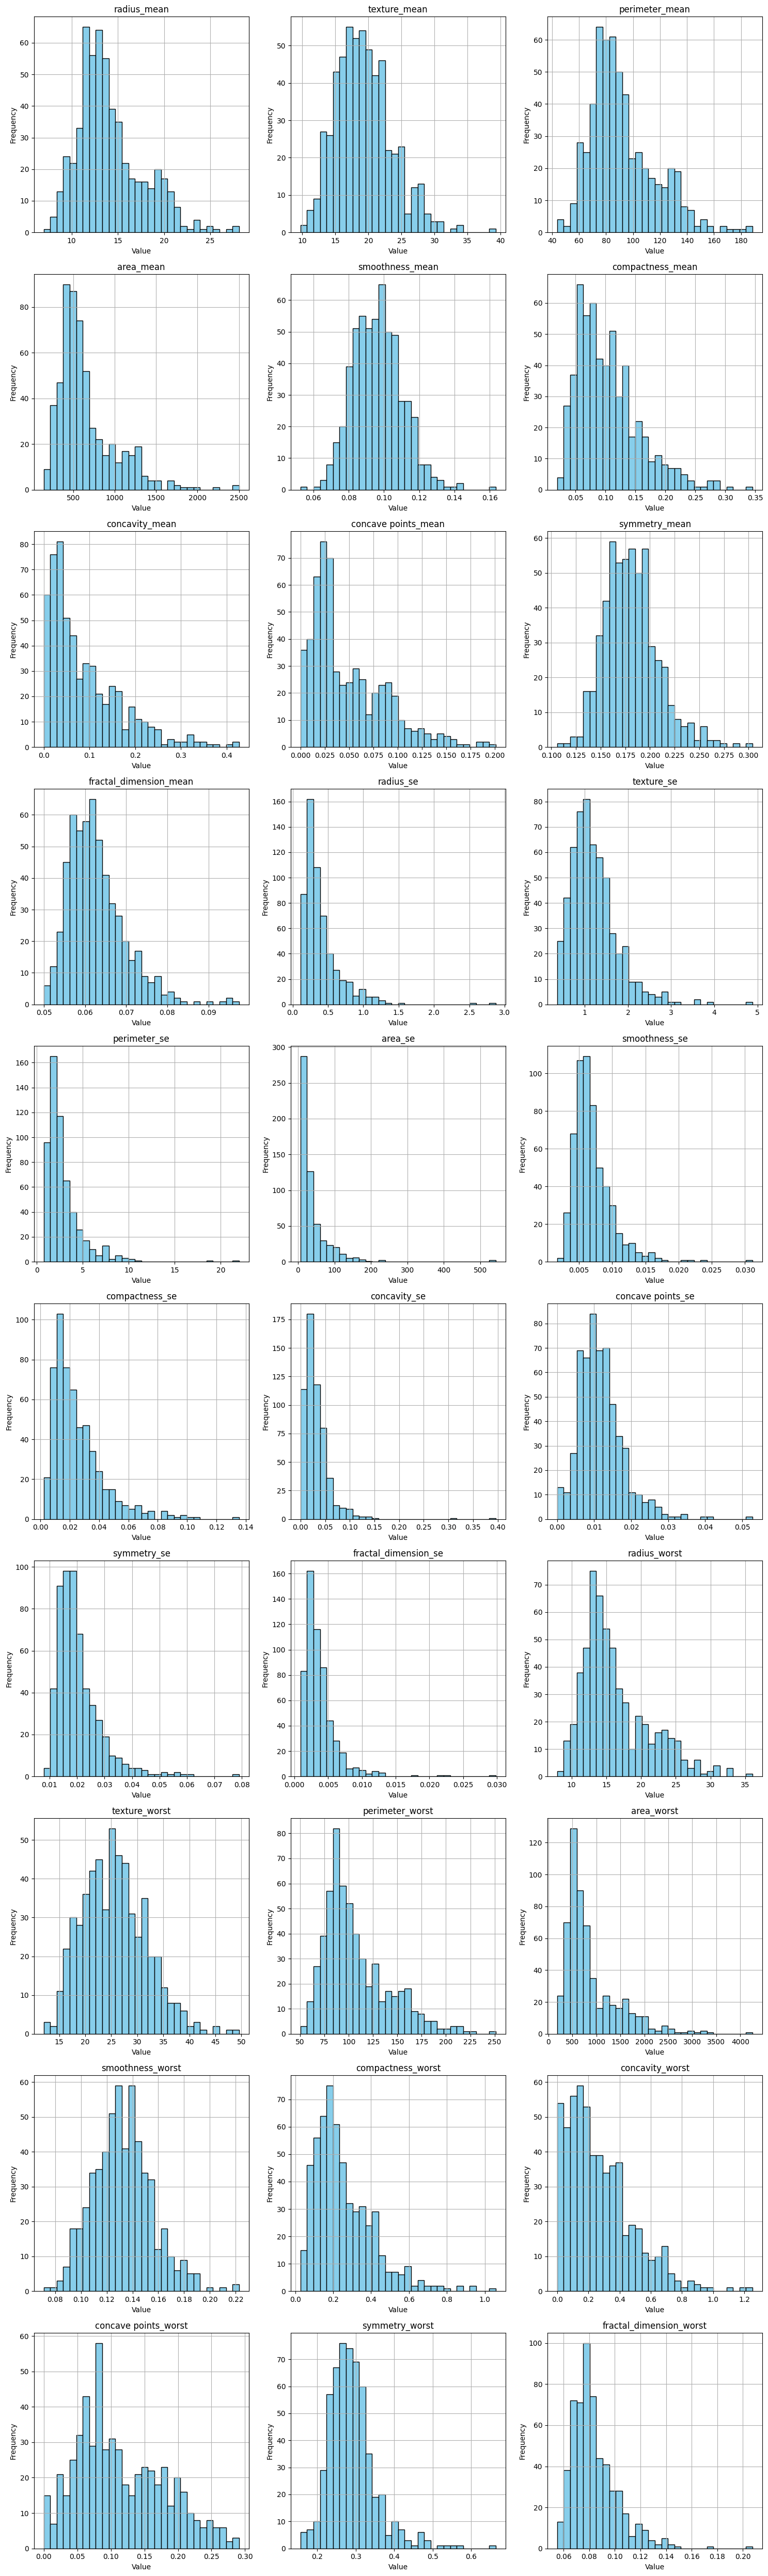

In [112]:
df_clean_plot = df_clean.drop(df_clean.columns[0], axis=1)

num_cols = 3
num_rows = int(np.ceil(len(df_clean_plot.columns) /num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()


for i, col in enumerate(df_clean_plot.columns):
    ax = axes[i]
    
    ax.hist(df_clean_plot[col], bins=30, color='skyblue', edgecolor='black')
    
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    
    ax.grid(True)
    
plt.tight_layout()

plt.show()

•	**Task 4:** Draw graphs to illustrate if there is any relationship between target column to any other columns of the dataset. Use Matplotlib library to complete this task. Also use sublot() function to show all plots in one figure.

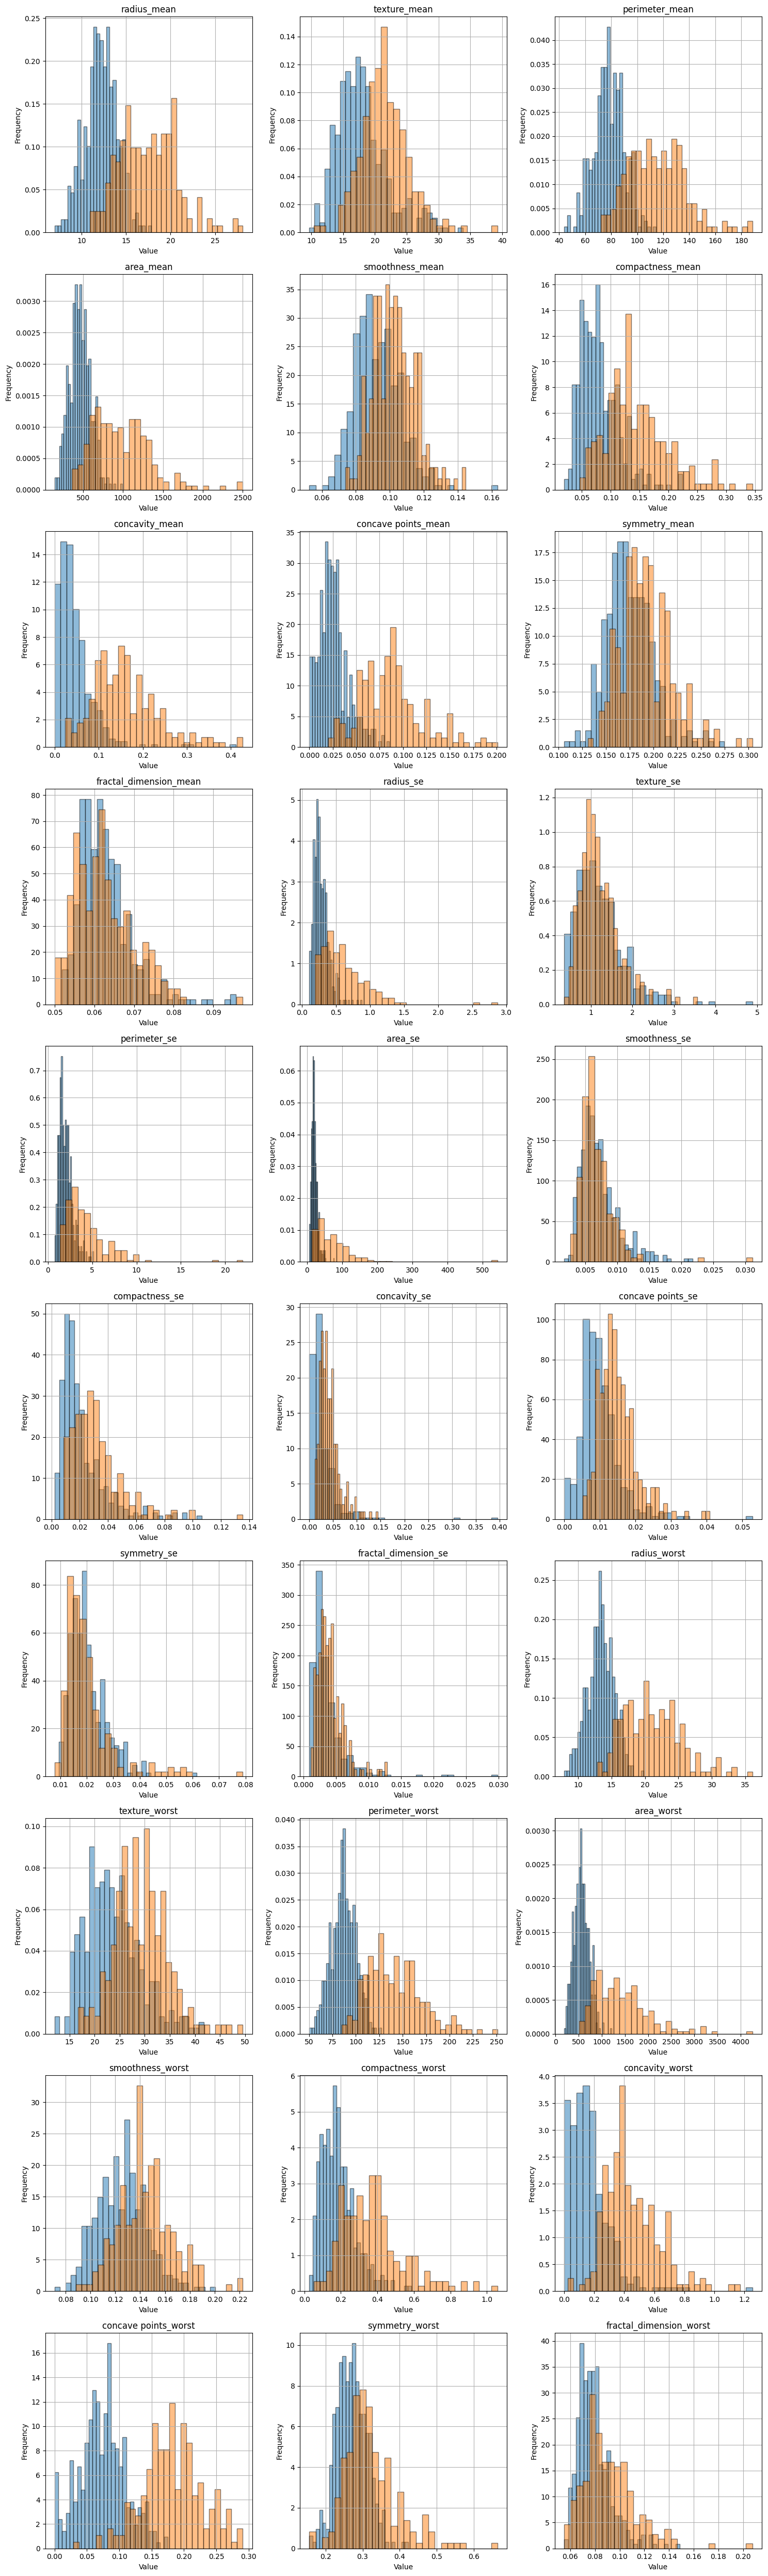

Point-biserial correlation coefficient for radius_mean: 0.73, p-value: 0.0000
Point-biserial correlation coefficient for texture_mean: 0.42, p-value: 0.0000
Point-biserial correlation coefficient for perimeter_mean: 0.74, p-value: 0.0000
Point-biserial correlation coefficient for area_mean: 0.71, p-value: 0.0000
Point-biserial correlation coefficient for smoothness_mean: 0.36, p-value: 0.0000
Point-biserial correlation coefficient for compactness_mean: 0.60, p-value: 0.0000
Point-biserial correlation coefficient for concavity_mean: 0.70, p-value: 0.0000
Point-biserial correlation coefficient for concave points_mean: 0.78, p-value: 0.0000
Point-biserial correlation coefficient for symmetry_mean: 0.33, p-value: 0.0000
Point-biserial correlation coefficient for fractal_dimension_mean: -0.01, p-value: 0.7599
Correlation is statistically insignificant for fractal_dimension_mean
Point-biserial correlation coefficient for radius_se: 0.57, p-value: 0.0000
Point-biserial correlation coefficient

In [113]:
df_clean_plot = df_clean.drop(df_clean.columns[0], axis=1)

num_cols = 3
num_rows = int(np.ceil(len(df_clean_plot.columns) /num_cols))

df_B = df_clean[df_clean['diagnosis'] == 'B']
df_M = df_clean[df_clean['diagnosis'] == 'M']

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
axes = axes.flatten()

for i, col in enumerate(df_clean_plot.columns):
    ax = axes[i]
    
    ax.hist(df_B[col], bins=30, edgecolor='black',alpha=0.5, label='B', density=True)
    ax.hist(df_M[col], bins=30, edgecolor='black',alpha=0.5, label='M', density=True)
    
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    
    ax.grid(True)

plt.tight_layout()
plt.show()

df_clean_ = df_clean.copy()
df_clean_['diagnosis'] = df_clean_['diagnosis'].map({'B': 0, 'M': 1})

df_sig = df_clean.copy()

for col in df_clean_plot.columns:
    correlation_coefficient, p_value = pointbiserialr(df_clean_['diagnosis'], df_clean_[col])
    print(f'Point-biserial correlation coefficient for {col}: {correlation_coefficient:.2f}, p-value: {p_value:.4f}')
    if p_value > 0.05:
        print(f'Correlation is statistically insignificant for {col}')
        df_sig = df_sig.drop(col, axis=1)

df_sig['diagnosis'] = df_sig['diagnosis'].map({'B': 0, 'M': 1})
df_sig.info()

•	**Task 5:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling if it is needed.

In [114]:
df_sig.describe()
for col in df_sig.columns[1:]:
    df_sig[col] = (df_sig[col] - df_sig[col].mean()) / df_sig[col].std()

print(df_sig)

     diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
295          0    -0.101387     -1.399581       -0.160872  -0.205133   
16           1     0.156839      0.195384        0.114036   0.084142   
431          0    -0.490144     -0.374247       -0.432077  -0.531633   
453          0     0.114274     -1.234505        0.077821  -0.030374   
15           1     0.117112      1.918224        0.195933   0.011113   
..         ...          ...           ...             ...        ...   
440          0    -0.895927     -0.485848       -0.832917  -0.805279   
165          0     0.239131      0.109358        0.145313   0.100340   
7            1    -0.118413      0.358135       -0.072803  -0.218772   
219          1     1.533097      3.064460        1.482818   1.614345   
326          0    -0.004907     -1.490257       -0.079799  -0.109087   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
295        -0.311451         -0.797743       -0.980551  

•	**Task 6:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 321 as the value of the random_state parameter of this function.

In [115]:
X = df_sig.drop('diagnosis', axis=1)
y = df_sig['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=321)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 25)
(114, 25)
(455,)
(114,)


•	**Task 7:** Apply Naïve Bayes Classifier to the dataset. Build (train) your prediction model in this step.

In [116]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9385964912280702
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        64
           1       0.96      0.90      0.93        50

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



•	**Taks 8:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

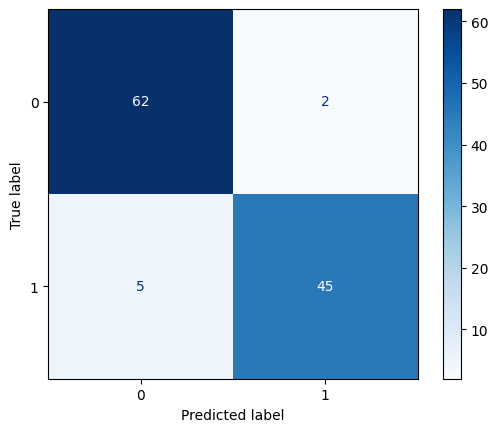

In [117]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=gnb.classes_)
cm_display.plot(cmap='Blues')
plt.show()

•	**Task 9:** Calculate the train and test accuracy of your model and compare them.

In [118]:
train_accuracy = accuracy_score(y_train, gnb.predict(X_train))

test_accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.9406593406593406
Test Accuracy: 0.9385964912280702


•	**Task 10:** Show how 10-fold cross validation can be used to build a naïve bayes classifier and report the accuracy of this model.

In [119]:
gnb = GaussianNB()

Kfolds = KFold(n_splits=10, shuffle=True, random_state=321)

scores = cross_val_score(gnb, X, y, cv=Kfolds)

print("Cross Validation scores:", scores)
print("Mean CV accuracy:", scores.mean())
print("Number of CV Scores used in Mean:", len(scores))

Cross Validation scores: [0.92982456 0.94736842 0.84210526 0.89473684 0.92982456 0.96491228
 0.94736842 0.87719298 0.96491228 0.98214286]
Mean CV accuracy: 0.9280388471177947
Number of CV Scores used in Mean: 10
